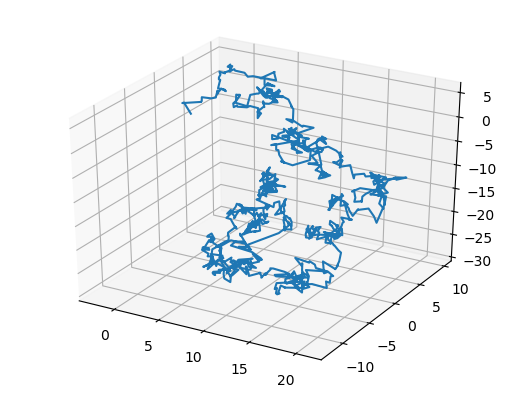

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7fa919f11898>

In [2]:
using Gadfly;
using Distributions;
using PyPlot;
using Plotly;
PyPlot.PyObject(PyPlot.axes3D)

# Random walk in 3D
# Using the spherical coordinate system - physics system
# In addition to r and theta we need phi to give us the new point in 3D
# How do we now encorporate bias and persistence into this using the parameters p, b, w?
# Is this even in continuous time or discrete time and how do we change this? Gillespie?

# Initialize vectors with zeros - same number as nsteps
x = zeros(1000)
y = zeros(1000)
z = zeros(1000)

# Initialize a vector the size of the number of steps you want to take
nsteps = zeros(1000)

# Need starting condition for x, y, z as it's 3D - start at the origin
x[1] = 0.0;
y[1] = 0.0;
z[1] = 0.0;

# Iterate through number of steps each time updating x, y and z values and store them in an array to plot
# Start at 2 due to x[i-1]
for i = 2:length(nsteps)
    
    # need to have a step size so we know how far to travel in the random direction
    # can set a step size or we can randomly sample from some distribution. Sample from normal distribution
    r = rand(Normal())
    # theta is equivalent to latitude and is a value somewhere between -pi and +pi
    # theta = pi*rand() results in clustering of points at poles so we must correct this. It's biased
    # we can't sample uniformally accross theta from 0 - pi we can maybe use inverse cumulitive distribution func.
    # this is the challenge to get unbiased sampling here
    theta = pi*rand()
    # phi is the azimuthal angle in longitude
    phi = 2*pi*rand()
    
#     println(theta)
    
    # step size ito x, y, z is
    dx = r*sin(theta)*cos(phi);
    dy = r*sin(theta)*sin(phi);
    dz = r*cos(theta);
    
    # need to find the new position at the end of this step just taken
    x[i] = x[i-1] + dx
    y[i] = y[i-1] + dy
    z[i] = z[i-1] + dz
            
end

using PyPlot; const plt = PyPlot

x = x
y = y
z = z

fig = plt.figure()
ax = fig[:add_subplot](111, projection="3d")    
ax[:plot](x, y, z)

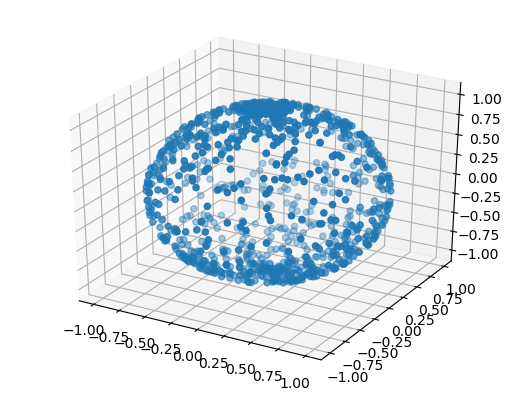

PyObject <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x7fa919a93e48>

In [7]:
# checking the code
# rather than plot random walk just plot set of random points on a sphere - check if we get a sphere
# this code show that there is bias at the poles which is due to the fact that sampling theta is inherantly bias
# generating same number of points at poles as we are at the equator and therefore they cluser more at the poles
# we need to sample theta in another way: inverse cdf method rather than sample uniformally from 

# WHY IS THIS NOT WORKING FOR << 1000 POINTS?

using Gadfly;
using Distributions;
using PyPlot;
using Plotly;
PyPlot.PyObject(PyPlot.axes3D)

y = zeros(1000)
z = zeros(1000)

npoints = zeros(1000)

for i = 2:length(npoints)
    
    # value of r doesn't matter now
    r = 1
    theta = pi*rand()
    phi = 2*pi*rand()
    
    x[i] = r*sin(theta)*cos(phi);
    y[i] = r*sin(theta)*sin(phi);
    z[i] = r*cos(theta);   
            
end

# when plotting now we don't want the points connected, but rather just dots to see if we get a sphere
x = x
y = y
z = z

using PyPlot
scatter3D(x, y, z)


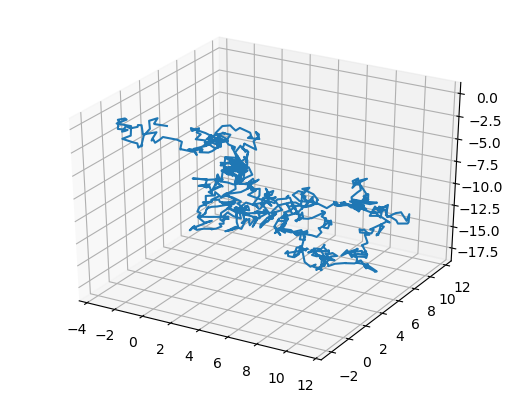

INFO: Loading HttpServer methods...


1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7fa922686470>

In [1]:
using Gadfly;
using Distributions;
using PyPlot;
using Plotly;
PyPlot.PyObject(PyPlot.axes3D)

# Random walk in 3D - removing the biased sampling of theta at the poles vs. equator

# Initialize vectors with zeros - same number as nsteps
x = zeros(1000)
y = zeros(1000)
z = zeros(1000)

# Initialize a vector the size of the number of steps you want to take
nsteps = zeros(1000)

# Need starting condition for x, y, z as it's 3D - start at the origin
x[1] = 0.0;
y[1] = 0.0;
z[1] = 0.0;

# Iterate through number of steps each time updating x, y and z values and store them in an array to plot
# Start at 2 due to x[i-1]
for i = 2:length(nsteps)
    
    # need to have a step size so we know how far to travel in the random direction
    # can set a step size or we can randomly sample from some distribution. Sample from normal distribution
    
    r = rand(TruncatedNormal(0,1,0,1))
    # theta is equivalent to latitude and is a value somewhere between -pi and +pi
    # theta = pi*rand() results in clustering of points at poles so we must correct this. It's biased
    # we can't sample uniformally accross theta from 0 - pi we can maybe use inverse cumulitive distribution func.
    # this is the challenge to get unbiased sampling here
    
    # theta = pi*rand()
    
    # here is unbiased sampling of theta:
    theta = acos(1-2*rand())
    
    # phi is the azimuthal angle in longitude
    phi = 2*pi*rand()
    
#     println(theta)
    
    # step size ito x, y, z is
    dx = r*sin(theta)*cos(phi);
    dy = r*sin(theta)*sin(phi);
    dz = r*cos(theta);
    
    # need to find the new position at the end of this step just taken
    x[i] = x[i-1] + dx
    y[i] = y[i-1] + dy
    z[i] = z[i-1] + dz
            
end

using PyPlot; const plt = PyPlot

x = x
y = y
z = z

fig = plt.figure()
ax = fig[:add_subplot](111, projection="3d")    
ax[:plot](x, y, z)

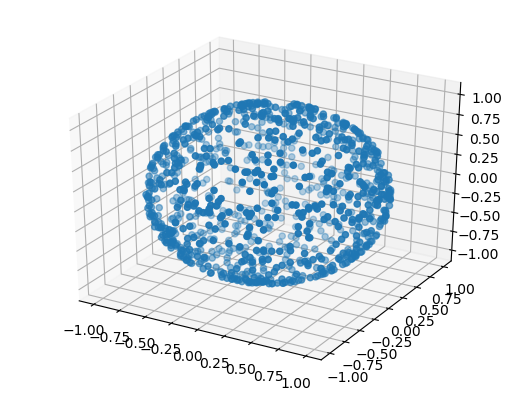

PyObject <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x7fd82bde45c0>

In [31]:
# checking the code is no longer biased to theta sampling

# WHY IS THIS NOT WORKING FOR << 1000 POINTS?

using Gadfly;
using Distributions;
using PyPlot;
using Plotly;
PyPlot.PyObject(PyPlot.axes3D)

y = zeros(1000)
z = zeros(1000)

npoints = zeros(1000)

for i = 2:length(npoints)
    
    # value of r doesn't matter now
    r = 1
    # arccos = inverse of the cosine function
    theta = acos(1-2*rand())
    phi = 2*pi*rand()
    
    x[i] = r*sin(theta)*cos(phi);
    y[i] = r*sin(theta)*sin(phi);
    z[i] = r*cos(theta);   
            
end

# when plotting now we don't want the points connected, but rather just dots to see if we get a sphere
x = x
y = y
z = z

using PyPlot
scatter3D(x, y, z)


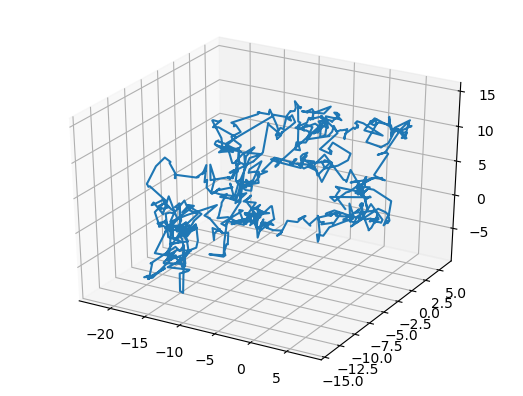

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f75344e0f98>

In [8]:
# Now try sampling from exponential distribution for step size/ cell displacement velocity

using Gadfly;
using Distributions;
using PyPlot;
using Plotly;
PyPlot.PyObject(PyPlot.axes3D)

# Initialize vectors with zeros - same size as number of steps/ nsteps
x = zeros(1000)
y = zeros(1000)
z = zeros(1000)

# Initialize vector for number of steps in RW
nsteps = zeros(1000)

# Need starting condition for x, y, z as it's 3D - start at the origin
x[1] = 0.0;
y[1] = 0.0;
z[1] = 0.0;

# Iterate through number of steps each time updating x, y and z values and store them in an array to plot
# Start at 2 due to x[i-1]
for i = 2:length(nsteps)
    
    # need to have a step size so we know how far to travel in the random direction - length of the walk/jump
    # can set a step size or we can randomly sample from some distribution. Sample from exponential distribution
    r = rand(Exponential())
    # theta is equivalent to latitude and is a value somewhere between -pi and +pi
    # theta = pi*rand() results in clustering of points at poles so we must correct this. It's biased
    # we can't sample uniformally accross theta from 0 - pi we can maybe use inverse cumulitive distribution func.
    # this is the challenge to get unbiased sampling here
    
    # theta = pi*rand()
    
    # here is unbiased sampling of theta:
    theta = acos(1-2*rand())
    
    # phi is the azimuthal angle in longitude
    phi = 2*pi*rand()
    
#     println(theta)
    
    # step size ito x, y, z is
    dx = r*sin(theta)*cos(phi);
    dy = r*sin(theta)*sin(phi);
    dz = r*cos(theta);
    
    # need to find the new position at the end of this step just taken
    x[i] = x[i-1] + dx
    y[i] = y[i-1] + dy
    z[i] = z[i-1] + dz
            
end

using PyPlot; const plt = PyPlot

x = x
y = y
z = z

fig = plt.figure()
ax = fig[:add_subplot](111, projection="3d")    
ax[:plot](x, y, z)

In [2]:
# Cleaned code:

using Gadfly;
using Distributions;
using PyPlot;
using Plotly;

PyPlot.PyObject(PyPlot.axes3D)

x = zeros(1000)
y = zeros(1000)
z = zeros(1000)

# Number of steps in the RW
nsteps = zeros(1000)

# Need starting condition - start at the origin
x[1] = 0.0;
y[1] = 0.0;
z[1] = 0.0;

# Iterate through number of steps each time updating x, y and z values 
for i = 2:length(nsteps)
    
    # Should this be exponential?
    r = rand(TruncatedNormal(0,1,0,1))
    # Here rand() needs to be replaced by function - maybe random sample from von mises?
    theta = acos(1-2*rand(VonMises()))
    phi = 2*pi*rand(VonMises())
    
    # step size ito x, y, z is
    dx = r*sin(theta)*cos(phi);
    dy = r*sin(theta)*sin(phi);
    dz = r*cos(theta);
    
    # Updated position at the end of the step just taken
    x[i] = x[i-1] + dx
    y[i] = y[i-1] + dy
    z[i] = z[i-1] + dz
            
end

# Plotting
using PyPlot; const plt = PyPlot

x = x
y = y
z = z

fig = plt.figure()
ax = fig[:add_subplot](111, projection="3d")    
ax[:plot](x, y, z)
# need to include a time step
# to impliment bias and persistence: function is currently sample random number. Replace this with sample from
# wrapped normal distribution (Julia doesn't have this distribution built in?) - Michael has wrapped
# normal distribution
# Look for wrapped normal in Matlab - then we can translate this.

# for bias: 
# mean = beta = angle of bias = vector pointing from cell to attractant
# variance = sigma = -2log(b) where b is somewhere between 0 and 1 (can we simply set b to something between 0-1?)
# can hardcode b between 0 and 1

# for persistence:
# mean = angle direction of previous step
# variance = sigma = -2log(p)

# autocorrelation - check this.

# probability of bias = w
# probability of persistence = 1-w


LoadError: [91mMethodError: no method matching quantile(::Distributions.VonMises{Float64}, ::Float64)[0m
Closest candidates are:
  quantile([91m::Distributions.DiscreteUniform[39m, ::Float64) at /home/megan/.julia/v0.6/Distributions/src/univariate/discrete/discreteuniform.jl:81
  quantile([91m::Distributions.EmpiricalUnivariateDistribution[39m, ::Float64) at /home/megan/.julia/v0.6/Distributions/src/empirical.jl:61
  quantile([91m::Distributions.Hypergeometric[39m, ::Real) at /home/megan/.julia/v0.6/Distributions/src/univariates.jl:547
  ...[39m

In [ ]:
# Need to create a biased persistent RW - angle of next step is in same direction of previous steps angle

# Bias = walker must favour one direction with more probability than all other directions
# Persistence = walker favours moving in the direction it was already going in - shows a kind of inertia

# Can model consist of non-interacting particles? Otherwise need to model this in

# Need to add time in here so that at each time step t, the direction of a cell is described by step length and 
# turning angle???

# Is the model purely directional (no restriction on distribution of step lenghts) or also distances measured 
# (mean squared displacement?)
# Anyway lets model step lengths according to exponential distribution







In [9]:
# Sample 1 random number from normal distribution with mean = 1 and variance = 2
rand(Normal(1, 2), 1)

1-element Array{Float64,1}:
 3.17731

In [ ]:
# turning angle follows a wrapped normal distribution
# pdf of a wrapped normal distribution:

pdf = (1/sigma(sqrt(2*pi)))*exp-(yt-mu+2*pi*i)^2/2*abs2(sigma)

In [ ]:
# For bias RW

# Sample from wrapped normal distribution with
# mu = beta = direction of bias
# sigma = variance = -2log(b)

# b lies in space 0-->1
# w = probability of biased direction



0.07987816178867271
0.37591026841239583
0.36338028893914126
0.7862557851449613
0.5812414211924413
0.7894813442958388
0.44496423062235824
0.19713837438504797
0.08637370800953714
0.4025221459065269
0.01136094615018928
0.3476372363992155
0.34010707103500254
0.565559433396735
0.13323636843435646
0.35419703166794886
0.9231399728454459
0.8180174845525926
0.2674947337208401
0.19113131751326898
0.10159780220694728
0.15120294782766694
0.06160805261502849
0.37265453420189293
0.7696142026383447
0.07100257383303578
0.4433233118708114
0.5297612546565035
0.9485107572375696
0.054097048328887114
0.21926050170024355
0.6948558778919072
0.7368567666286331
0.34204232085421005
0.48384020111729686
0.7738272023560955
0.9377575401047812
0.28665243279974983
0.5300555516510388
0.586840812140977
0.7007130955181219
0.476527545559762
0.7246178320853215
0.003118379599672419
0.1752894924252809
0.5444132022896407
0.28382447987602405
0.43793758030519775
0.6203424018232835
0.0033314680009657754
0.5784935737891219
0.390

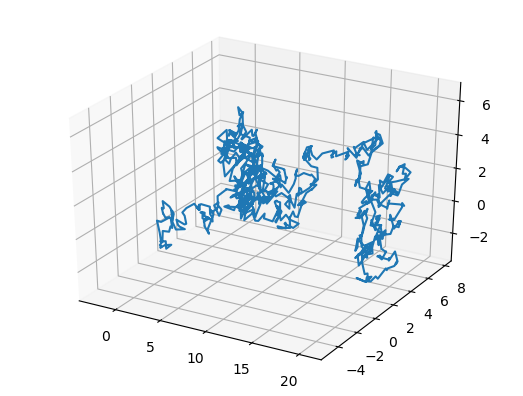

0.1987932134330513
0.2543115536564444
0.5984512171896869
0.0653366094921859
0.8004972776546504
0.25851890270785016
0.28986723188126223
0.2623031807509396
0.2069810871201009
0.957224579443242
0.9796423223502981
0.08968158927953926
0.13778538812783186
0.1333255954210018
0.040970275401077824
0.05155458734759883
0.548435826641227
0.025321744494716653
0.29606337091778506
0.3703145279484163
0.08946704470228609
0.5546002078755814
0.24474295798721854
0.05006193286171362
0.38170753810129643
0.36455647546040115
0.9985446582045412
0.988526969443455
0.7936621713856392
0.5043008000652175
0.06923750749867887
0.8355992931265841
0.005569400899225105
0.09362179198586137
0.03786807099039917
0.8085884873671224
0.07544455284097477
0.8253544412494851
0.5131649224339657
0.45207849471147393
0.87581045137041
0.22243494339431905
0.5222170027026856
0.8459402349993725
0.4605091221263019
0.062050084540460855
0.791364493125925
0.734260156447514
0.5712163662822031
0.09224076226071698
0.9312127437736303
0.9542282736

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7fd82beeecf8>

In [29]:
# Cleaned code:

using Gadfly;
using Distributions;
using PyPlot;
using Plotly;

PyPlot.PyObject(PyPlot.axes3D)

x = zeros(1000)
y = zeros(1000)
z = zeros(1000)

# Number of steps in the RW
nsteps = zeros(1000)

# Need starting condition - start at the origin
x[1] = 0.0;
y[1] = 0.0;
z[1] = 0.0;

# Need to include a time factor so we can calculate waiting times between jumps
# Can use a Gaussian distribution/ power-law/ 

# empty array to store turning angles
# beta = zeros(1000)
# alpha = zeros(1000)

# Iterate through number of steps each time updating x, y and z values 
for i = 2:length(nsteps)
    
    # Calculate an arbitrary/random angle in 3D: need r, theta and phi 
    
    # r is the jump length and sampled randomly from normal dist between 0 and 1
    r = rand(TruncatedNormal(0,1,0,1))
    # theta - latitude value between -pi and pi
    theta = acos(1-2*rand())
    # 
    phi = 2*pi*rand()
    
   
    # mapping spherical coordinates onto the cartesian plane we need the following equations for x,y,z
    # step size ito x, y, z is
    dx = r*sin(theta)*cos(phi);
    dy = r*sin(theta)*sin(phi);
    dz = r*cos(theta);
    
#     println(dx)
    
    # Updated position at the end of the step just taken ito spherical coordinate system
    x[i] = x[i-1] + dx
    y[i] = y[i-1] + dy
    z[i] = z[i-1] + dz
    
    # Need to update bias and persistence angles
    # bias angle: angle between motion vector and vector towards the wound - set some verctor that describes
    # direction toward wound/source
#     bias[i] = bias[i-1] 
    # persistence angle: angle between current motion vector and preceding motion vector
#     persistence[i] = persistence[i-1] 
            
end

# Plotting
using PyPlot; const plt = PyPlot

x = x
y = y
z = z

fig = plt.figure()
ax = fig[:add_subplot](111, projection="3d")    
ax[:plot](x, y, z)
# need to include a time step
# to impliment bias and persistence: function is currently sample random number. Replace this with sample from
# wrapped normal distribution (Julia doesn't have this distribution built in?) - Michael has wrapped
# normal distribution
# Look for wrapped normal in Matlab - then we can translate this.

# for bias: 
# mean = beta = angle of bias = vector pointing from cell to attractant
# variance = sigma = -2log(b) where b is somewhere between 0 and 1 (can we simply set b to something between 0-1?)
# can hardcode b between 0 and 1

# for persistence:
# mean = angle direction of previous step
# variance = sigma = -2log(p)

# autocorrelation - check this.

# probability of bias = w
# probability of persistence = 1-w


In [25]:
# Cleaned code: # trying with i+1 = i + dx etc.

using Gadfly;
using Distributions;
using PyPlot;
using Plotly;

PyPlot.PyObject(PyPlot.axes3D)

x = zeros(1000)
y = zeros(1000)
z = zeros(1000)

# Number of steps in the RW
nsteps = zeros(1001)

# Need starting condition - start at the origin
x[1] = 0.0;
y[1] = 0.0;
z[1] = 0.0;

# Iterate through number of steps each time updating x, y and z values 
for i = 1:length(nsteps)
    
    # Calculate an arbitrary/random angle in 3D: need r, theta and phi 
    
    # r is the jump length and sampled randomly from normal dist between 0 and 1
    r = rand(TruncatedNormal(0,1,0,1))
    # theta - latitude value between -pi and pi
    theta = acos(1-2*rand())
    phi = 2*pi*rand()
    
    println(theta)
    
    # mapping spherical coordinates onto the cartesian plane we need the following equations for x,y,z
    # step size ito x, y, z is
    dx = r*sin(theta)*cos(phi);
    dy = r*sin(theta)*sin(phi);
    dz = r*cos(theta);
    
   
    # Updated position at the end of the step just taken ito spherical coordinate system
    x[i+1] = x[i] + dx
    y[i+1] = y[i] + dy
    z[i+1] = z[i] + dz
    
end

# Plotting
using PyPlot; const plt = PyPlot

x = x
y = y
z = z

fig = plt.figure()
ax = fig[:add_subplot](111, projection="3d")    
ax[:plot](x, y, z)

1.2470728760567606
1.3321278839066115
1.7609180729394034
0.8587636075781239
1.7288112333508319
2.6288503779384267
0.32349237288078236
0.9682411678915124
1.427716443506243
1.432526707676813
2.2243658832885775
1.1680988264784964
0.9315653510246596
0.926326615074889
1.7027286857852184
1.7355874363641375
1.8798613953279057
1.203794928322655
1.4315853480322098
1.389588403038307
1.2109449149198168
0.5420126473124599
0.6953211907442652
0.9826871312055855
0.8892489859541551
1.3289769279225392
1.7086313029460019
1.8665268689864467
1.5203271246180454
1.9237660451589909
0.8593865220081779
1.5491550645967413
1.4080943496147407
1.42458715568058
1.156446659419892
2.6288042478581373
1.8077346072351115
2.276562402565875
0.8782841044769276
0.9932293019091327
1.2028668225331205
2.672977929251343
2.2414255721630547
2.7044562212249774
2.314210814327667
1.6008797595077258
1.9786107553348669
2.0056170287969417
1.508277239868705
2.8435355542377354
1.2732461171828022
1.5380183519959119
0.6324011187741548
2.62

1.3831406591035824
1.0490438104291466
2.1387580032611906
1.1645826282920138
0.8699583646676036
2.4742164021802435
1.802647020336075
1.5285283316612037
2.094445598908345
1.0717541647027278
0.5334486577832445
0.815357116067149
1.3115636432461526
2.5249130630757115
1.5775673555818837
0.3880887372624791
0.591897347185446
0.9437775994615188
2.699464650210829
2.165659328514788
1.5332345487952692
1.3776986314179207
2.164026335111159
2.2468981829344084
0.7877727758232564
2.2688753375186668
2.71164266786387
2.062791593904852
1.032400142953396
1.5550164250515732
1.6216756620989135
2.3428658434549514
1.9079097946596844
2.578629042242733
1.1537650776593582
2.337305052725994
0.5780815085519106
1.183300559472158
1.7984689992710319
1.5949322678158244
0.8253951234385868
0.8279937508555826
1.5128874156644572
1.936010907359631
1.9730837912767616
0.9854432326813762
1.876917936276386
0.6456960725817494
1.4102035952161702
2.002365804661452
0.6645638319601255
1.7726203395331583
2.1578011911651056
2.71040448

LoadError: [91mBoundsError: attempt to access 1000-element Array{Float64,1} at index [1001][39m

In [17]:
# Maybe rather create vectors for x,y and z and then update these positions using rotation matrix?
xdirection = [vector(-1,0,0), vector(1,0,0)]
ydirection = [vector(0,-1,0), vector(0,1,0)]
zdirection = [vector(0,0,-1), vector(0,0,1)]

LoadError: [91mUndefVarError: vector not defined[39m

In [35]:
rand(VonMises(30,2))

LoadError: [91mMethodError: no method matching quantile(::Distributions.VonMises{Float64}, ::Float64)[0m
Closest candidates are:
  quantile([91m::Distributions.DiscreteUniform[39m, ::Float64) at /home/megan/.julia/v0.6/Distributions/src/univariate/discrete/discreteuniform.jl:81
  quantile([91m::Distributions.EmpiricalUnivariateDistribution[39m, ::Float64) at /home/megan/.julia/v0.6/Distributions/src/empirical.jl:61
  quantile([91m::Distributions.Hypergeometric[39m, ::Real) at /home/megan/.julia/v0.6/Distributions/src/univariates.jl:547
  ...[39m